In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('titanic3.csv')
train.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
print('\n### 훈련 데이터 셋 정보 ###\n')
print(train.info())


### 훈련 데이터 셋 정보 ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None


In [15]:
train['age'].fillna(train['age'].mean(), inplace= True)

train['cabin'].fillna('N', inplace=True)
train['embarked'].fillna('N', inplace=True)
print('데이터 Null 값의 갯수: ', train['cabin'].isnull().sum().sum())
print('데이터 Null 값의 갯수: ', train['embarked'].isnull().sum().sum())

데이터 Null 값의 갯수:  0
데이터 Null 값의 갯수:  0


In [17]:
print('성별 값 분포 : \n', train['sex'].value_counts())
print('\nCabin 값 분포 : \n', train ['cabin'].value_counts())
print('\nEnbarked 값 분포 : \n', train['embarked'].value_counts())


성별 값 분포 : 
 sex
male      843
female    466
Name: count, dtype: int64

Cabin 값 분포 : 
 cabin
N                  1014
C23 C25 C27           6
G6                    5
B57 B59 B63 B66       5
C22 C26               4
                   ... 
E63                   1
B102                  1
B39                   1
D40                   1
F38                   1
Name: count, Length: 187, dtype: int64

Enbarked 값 분포 : 
 embarked
S    914
C    270
Q    123
N      2
Name: count, dtype: int64


In [18]:
train['cabin'] = train['cabin'].str[:1]
print(train['cabin'].head(3))

0    B
1    C
2    C
Name: cabin, dtype: object


In [20]:
train.groupby(['sex', 'survived'])['survived'].count().to_frame()

survived
sex    survived          
female 0              127
       1              339
male   0              682
       1              161

<Axes: xlabel='sex', ylabel='survived'>

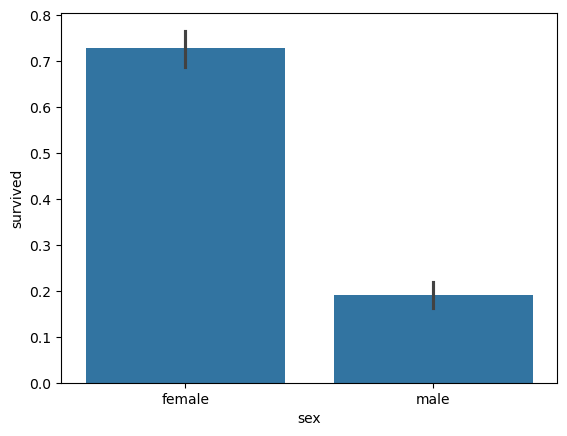

In [21]:
sns.barplot(x='sex', y='survived', data=train)

<Axes: xlabel='pclass', ylabel='survived'>

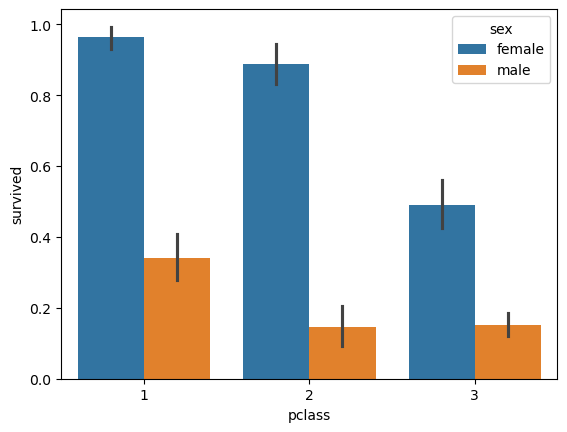

In [22]:
sns.barplot(x = 'pclass', y = 'survived', hue='sex', data = train)

In [23]:
def get_category(age):
    cat = ''
    if age <= -1 : cat = 'Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else: cat = 'Elderly'

    return cat


plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

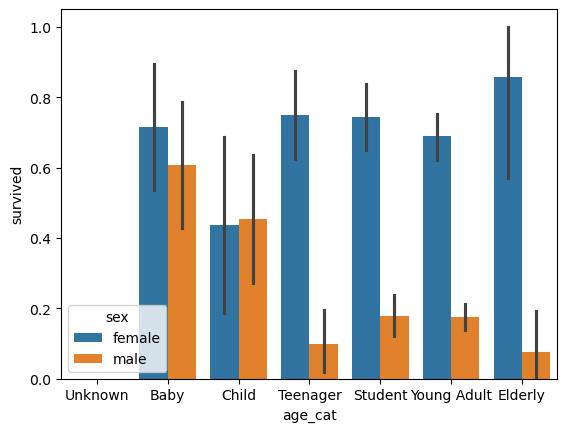

In [24]:
group_names = ['Unknown','Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Elderly']

train['age_cat'] = train['age'].apply(lambda x: get_category(x))
sns.barplot(x='age_cat', y='survived', hue = 'sex', data = train, order = group_names)
train.drop('age_cat', axis=1, inplace=True)

In [25]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features = ['cabin', 'sex', 'embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

train = encode_features(train)
train.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.00,0,0,24160,211.3375,1,3,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",1,0.92,1,2,113781,151.5500,2,3,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",0,2.00,1,2,113781,151.5500,2,3,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.00,1,2,113781,151.5500,2,3,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.00,1,2,113781,151.5500,2,3,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
def fillna(df):
    df['age'].fillna(df['age'].mean(), inplace=True)
    df['cabin'].fillna('N', inplace = True)
    df['embarked'].fillna('N', inplace=True)
    df['fare'].fillna(0, inplace = True)
    return df 


def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
    return df


def format_features(df):
    df['cabin'] = df['cabin'].str[:1]
    features = ['cabin', 'sex', ' embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df


def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

